In [1]:
import numpy as np
#import pandas as pd
#import scipy.special as sp
import matplotlib.pyplot as plt
#import healpy as hp
import scipy.constants as const
#import scipy.optimize as op
#import scipy.integrate as integrate
import matplotlib as mpl
#from P_cygni import P_cygni

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : True,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()],
          "text.latex.preamble" : r"\usepackage{amsmath}"}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [6]:
class P_cygni(object):
    
    def __init__(self, nu_obs, th_obs, v0 = 8e6, nu0 = 1, ds = const.parsec*1e6, t = 10*const.day):
        self.nu_obs = np.expand_dims(nu_obs, axis = 0)
        self.th_obs = np.expand_dims(th_ar, axis = 1)
        self.v0 = v0
        self.nu0 = nu0
        self.ds = ds
        self.t = t
        self.th_max = v0*t/ds
        self.vel = self.get_v()
        self.geo_w = self.get_geo_W()
        #self.opt_depth = self.get_tau()
        
    def get_v(self):
        vel = np.sqrt((self.ds*self.th_obs/self.t)**2 + 
                      (1- self.nu0/self.nu_obs)**2*const.c**2)*np.sign(1- self.nu0/self.nu_obs)
        cond = (vel > self.v0) + (self.th_obs > self.th_max)
        
        return vel*cond


    def opt_depth(self, tau0 = 2, n = 5):
        
        tau = np.abs(tau0*(self.v0/self.vel)**(n)*(self.vel!=0))
        self.tau = np.nan_to_num(tau, nan = 0)
    
    def get_geo_W(self):
        w = 1/2*(1-np.sqrt(1-(self.v0/self.vel)**2))*(self.vel!=0)
        return np.nan_to_num(w, nan = 0)
    
    
    def get_abs(self):
        return np.exp(-self.tau)*(self.th_obs <= self.th_max)
        #w = 1/2*(1-np.sqrt(1-(self.v0/self.vel)**2))*(self.vel!=0)
        #return np.nan_to_num(w, nan = 0)

    def get_em(self):
        return (1 - np.exp(-self.tau))*self.geo_w



In [7]:
th_max = 8e6*10*const.day/const.parsec/1e6

lam_obs = np.arange(1/.9, 1/1.1, -.0001)
nu_obs = 1/lam_obs
th_ar = np.linspace(0, 2*th_max, 1001)
th_mid = (th_ar[1:] + th_ar[:-1])/2
d_th = th_ar[1] - th_ar[0]


spec = P_cygni(nu_obs, th_ar)
spec.opt_depth(tau0 = 2, n = 5)

In [8]:
p_cyg_abs = np.sum(spec.get_abs()*spec.th_obs, axis = 0)*2/spec.th_max**2*d_th
p_cyg_em = np.sum(spec.get_em()*spec.th_obs, axis = 0)*2/spec.th_max**2*d_th

Text(0.5, 1.0, 'integrated intensity')

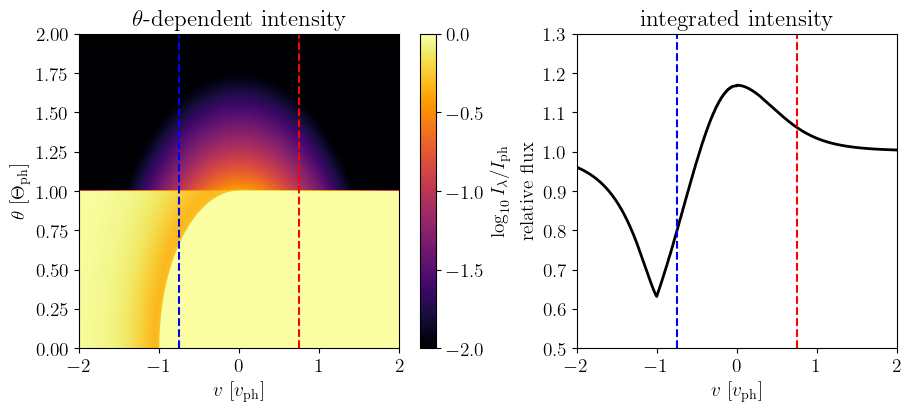

In [9]:
fig = plt.figure(figsize = (9,4),layout="constrained")
plt.subplot(121)
plt.imshow(np.log10(np.flip(spec.get_em() + spec.get_abs())),extent=((1/nu_obs[-1]-1)*const.c/8e6, 
                                                           (1/nu_obs[0]-1)*const.c/8e6, 0, 2), 
           aspect = 'auto', vmin = -2, vmax = 0, cmap = 'inferno')
plt.axvline(-.75, color = 'b', linestyle = '--')
plt.axvline(.75, color = 'r', linestyle = '--')
plt.colorbar(label = r'$\log_{10}{I_\lambda/I_\text{ph}}$', ticks=[-2,-1.5, -1,-0.5, 0])
plt.xlabel('$v~[v_\\text{ph}]$')
plt.ylabel(r'$\theta~[\Theta_\text{ph}]$')
plt.title('$\\theta$-dependent intensity')
plt.xlim(-2, 2)


plt.subplot(122)
plt.plot((1/nu_obs-1)*const.c/8e6, p_cyg_em + p_cyg_abs, 'k-', lw = 2)
plt.axvline(-.75, color = 'b', linestyle = '--')
plt.axvline(.75, color = 'r', linestyle = '--')
plt.xlabel('$v~[v_\\text{ph}]$')
plt.ylabel('relative flux')
plt.ylim(0.5,1.3)
#plt.xlim(-20/8, 20/8)
plt.xlim(-2, 2)
plt.title('integrated intensity')
#plt.constraint_layout()
#plt.savefig('P_cygni_full.pdf', bbox_inches = 'tight')